<a href="https://colab.research.google.com/github/rafsanalhad/PCVK_17_Harafsan_Alhad/blob/main/Emotion%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!ls /content

FacialEmotion.zip  sample_data


In [12]:
from zipfile import ZipFile

file_name = "/content/FacialEmotion.zip"  # Pastikan nama file persis sama

# 3. Tambahkan pengecekan error
try:
    with ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall()
        print("Ekstraksi berhasil!")
except FileNotFoundError:
    print(f"File {file_name} tidak ditemukan. Mohon periksa nama dan lokasi file.")
except Exception as e:
    print(f"Terjadi error: {str(e)}")

Ekstraksi berhasil!


In [14]:
!pip install --upgrade keras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 866.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incomp

In [2]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Cara 1: Menggunakan parameter learning_rate
emotion_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # lr diganti menjadi learning_rate
    metrics=['accuracy']
)

# Menggunakan fit() instead of fit_generator()
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=7178 // 64
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 449s 992ms/step - accuracy: 0.2506 - loss: 1.8328 - val_accuracy: 0.3354 - val_loss: 1.7072
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 10:21 1s/step - accuracy: 0.3750 - loss: 1.6603

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.3750 - loss: 1.6603 - val_accuracy: 0.4000 - val_loss: 1.7622
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 437s 976ms/step - accuracy: 0.3419 - loss: 1.6677 - val_accuracy: 0.4188 - val_loss: 1.5335
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 126us/step - accuracy: 0.2969 - loss: 1.6095 - val_accuracy: 0.4000 - val_loss: 1.5104
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 441s 985ms/step - accuracy: 0.4066 - loss: 1.5421 - val_accuracy: 0.4442 - val_loss: 1.4522
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 138us/step - accuracy: 0.3281 - loss: 1.5829 - val_accuracy: 0.6000 - val_loss: 1.2364
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 444s 990ms/step - accuracy: 0.4455 - loss: 1.4523 - val_accuracy: 0.4742 - val_loss: 1.3796
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 161us/step - accuracy: 0.5469 - loss: 1.3130 - val_accuracy: 0.5000 - val_loss: 1.4739
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 438s 978ms/step - accuracy: 0.4806 - loss: 1.3752 - val

In [8]:
#Saving the model
emotion_model.save('model.keras')

In [9]:
from keras.models import load_model
emotion_model = load_model('model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [13]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

--2024-11-02 13:49:26--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 676709 (661K) [text/plain]
Saving to: ‘haarcascade_frontalface_alt.xml’

haarcascade_frontal 100%[===================>] 660.85K  --.-KB/s    in 0.04s   

Last-modified header missing -- time-stamps turned off.
2024-11-02 13:49:26 (15.3 MB/s) - ‘haarcascade_frontalface_alt.xml’ saved [676709/676709]

Wajah berhasil di-crop dan disimpan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


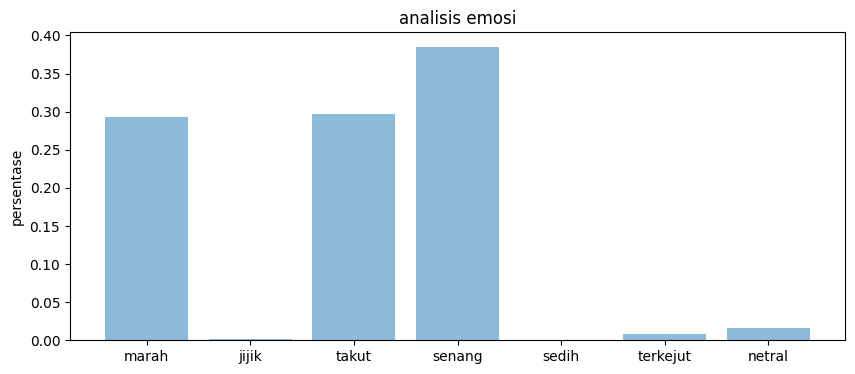

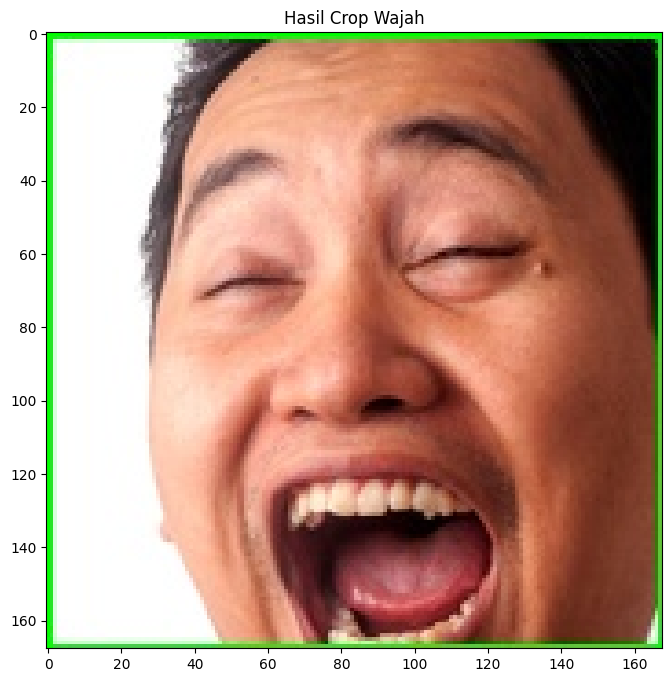


Hasil Prediksi:
Marah: 29.26%
Jijik: 0.14%
Takut: 29.64%
Senang: 38.49%
Sedih: 0.06%
Terkejut: 0.76%
Netral: 1.65%

Emosi yang terdeteksi: Senang


In [17]:
# Import library yang diperlukan
import cv2
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def facecrop(image):
    # Download cascade file jika belum ada
    !wget -N https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml

    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    if img is None:
        print("Error: Tidak dapat membaca gambar")
        return

    try:
        # Konversi ke grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        if len(faces) == 0:
            print("Tidak ada wajah terdeteksi")
            return

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            sub_face = img[y:y+h, x:x+w]
            cv2.imwrite('capture.jpg', sub_face)
            print("Wajah berhasil di-crop dan disimpan")

    except Exception as e:
        print(f"Error: {str(e)}")

def emotion_analysis(emotions):
    objects = ['marah', 'jijik', 'takut', 'senang', 'sedih', 'terkejut', 'netral']
    y_pos = np.arange(len(objects))

    plt.figure(figsize=(10, 4))
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('persentase')
    plt.title('analisis emosi')
    plt.show()

if __name__ == '__main__':
    # Crop wajah dari foto
    facecrop('/content/photo.jpg')

    try:
        # Load dan proses gambar hasil crop
        file = '/content/capture.jpg'
        true_image = image.load_img(file)
        img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

        # Konversi ke array dan preprocessing
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x /= 255

        # Prediksi emosi
        custom = emotion_model.predict(x)

        # Tampilkan grafik analisis emosi
        emotion_analysis(custom[0])

        # Tampilkan gambar hasil crop
        plt.figure(figsize=(8, 8))
        plt.imshow(true_image)
        plt.title('Hasil Crop Wajah')
        plt.show()

        # Tampilkan hasil prediksi dalam persentase
        emotions = ['Marah', 'Jijik', 'Takut', 'Senang', 'Sedih', 'Terkejut', 'Netral']
        print("\nHasil Prediksi:")
        for i, emotion in enumerate(emotions):
            print(f"{emotion}: {custom[0][i]*100:.2f}%")

        # Tampilkan emosi dengan probabilitas tertinggi
        predicted_emotion = emotions[np.argmax(custom[0])]
        print(f"\nEmosi yang terdeteksi: {predicted_emotion}")

    except Exception as e:
        print(f"Error dalam pemrosesan gambar: {str(e)}")